---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Clustering

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


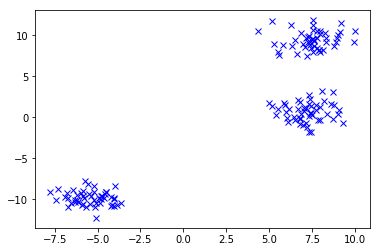

In [37]:
from sklearn import datasets     #toy datasets

X, _ = datasets.make_blobs(n_samples=150, random_state=8) # cos'è il _ dopo la virgola???
#X, _ = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)
# factor = fattore di scala tra cerchio interno ed esterno
# noise = sigma della dispersione gaussiana ai lati della circonferenza teorica

plot(X[:, 0], X[:, 1], 'bx')

# Kmeans clustering

[[-5.43790266 -9.83963795]
 [ 7.21711781  0.68887741]
 [ 7.51338019  9.44881625]]


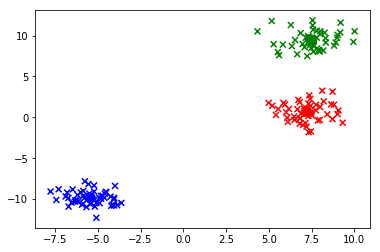

In [49]:
from sklearn import cluster

#vogliamo avere un metodo per dividere i punti così come noi li facciamo a 
#livello visivo.

#prendo 3 punti a caso, saranno i miei tre centroidi iniziali

kmeans = cluster.KMeans(n_clusters=3, init='random',
                        n_init=10, max_iter=10, random_state=1)

# abbiamo fissato il numero di cluster che vogliamo trovare. Se qua metto 2.
# me ne trova 2 senza problemi. Se metto a 4, me ne trova 4.
# --> problema è capire il num di cluster ottimale.
# n di inizializzazioni. si può inizializzare l'algoritmo tante volte,
# così lui vede qual la situazione ottimale tra quelle proposte.
# pongo numero max di iterazioni = 10
# se metto random state = 2, l'algoritmo non riesce bene a dividere

C = kmeans.fit_predict(X)
# allo stesso momento mi fa il fit e poi per ogni punto mi da il cluster 
# a cui è stato assegnato

colors = array(['b', 'r', 'g', 'y'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
print (centers)

scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

# Hierarchical clustering

In [8]:
from scipy.cluster.hierarchy import distance


# andiamo a creare una gerarchia dei punti utilizzando la distanza
# 1) si calcolano tutte le distanze tra tutti i punti. prendo i due punti
#    a distanza minima. Questi due vengono raggruppati in un unico nodo
# 2) questo nuovo nodo avrà un nuovo centroide: es la media tra i due punti
# 3) calcolo di nuovo la distanza tra tutti i punti (questi 2 sono 
#    rappresentati dal centroide)
# 4) prendo i due punti più vicini e creo un altro cluster.
# ecc... in questo modo creo una gerarchia ad albero.
# NON ho ancora creato i cluster !!!
# ora, in base a dove taglio l'albero, formo un numero diverso di cluster!

#es albero    |
#      |----------------|-----------|
#    |----|         |--------|      |
#    1    2         3        4      5
# questa è una gerarchia tra 5 punti. 


In [5]:
# distance.pdist?     #calcola la distanza tra coppie di osservazioni nello spazio n_dimensionale

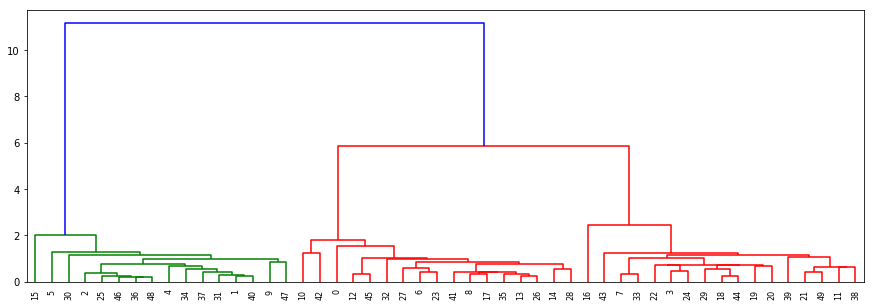

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X, _ = datasets.make_blobs(n_samples=50, random_state=8) 

#X, _ = datasets.make_circles(n_samples=500, factor=.5, noise=.05)
# qua prova a eseguire prima con la prima riga e poi con l seconda.
# se esegui con la seconda, devi modificare anche la cella seguente:
# dovrai mettere "2" come secondo argomento di fcluster(.. , .., ..)

Z = linkage(X)          #divide in cluster i punti della matrice X, calcolando le distanze tra coppie
                #The following linkage methods are used to compute the distance d(s,t) between two clusters s and t

figure(figsize=(15,5))
P = dendrogram(Z);      #disegna il dendogramma di Z

# se taglio la linea blu --> formo due cluster
# se taglio al livello del rosso --> ottengo 3 cluster

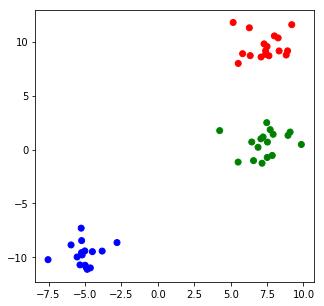

In [56]:
T = fcluster(Z, 3, 'maxclust')         # --> qua prova a mettere anche 2 come secondo argomento
                                       # taglia l'albero Z in modo da formare 3 cluster
                                       # e assegna un'etichetta (1,2,3) ai punti a seconda del cluster 
                                       # dove li ha messi
            
            
colors = array(['b', 'r', 'g', 'y', 'k'])

figure(figsize=(5,5))
scatter(X[:, 0], X[:, 1], color=colors[T-1]);  # ogni punto lo coloro con il colore T-1, cioè prendo l'etichetta del 
                                               # punto -1

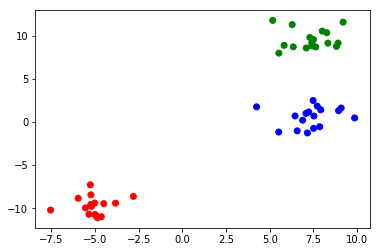

In [57]:
aggl = cluster.AgglomerativeClustering(n_clusters=3)
# Unisce in modo ricorsivo la coppia di cluster che aumenta leggermente una determinata distanza di collegamento.
# uso questo metodo per dividere X

C = aggl.fit_predict(X) 

colors = array(['b', 'r', 'g'])
scatter(X[:, 0], X[:, 1], c=colors[C])

# Microarray data clustering

Rosenwald, Andreas, et al. "The use of molecular profiling to predict survival after chemotherapy for diffuse large-B-cell lymphoma." New England Journal of Medicine 346.25 (2002): 1937-1947.

http://www.nejm.org/doi/full/10.1056/NEJMoa012914#t=article  
"Hierarchical clustering was used to define subgroups of diffuse large-B-cell lymphoma."

Data:  
http://llmpp.nih.gov/DLBCL/

In [12]:
import pandas as pd

In [29]:
# Creo una color map 


def RedBlackGreen():
    cdict = {'red':   ((0.0, 0.0, 0.0),
                       (0.5, 0.0, 0.1),
                       (0.7, 1.0, 1.0),
                       (1.0, 1.0, 1.0)),
    
             'blue': ((0.0, 0.0, 0.0),
                      (1.0, 0.0, 0.0)),
    
             'green':  ((0.0, 0.0, 1.0),
                        (0.3, 1.0, 1.0),
                       (0.5, 0.1, 0.0),
                       (1.0, 0.0, 0.0))
            }
    
    my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return my_cmap

redblackgreen = RedBlackGreen()

In [30]:
# Importo i dati direttamente dal file .cdt disponibile dal sito 
df = pd.read_csv("data/Fig1A.cdt", sep="\t", index_col=['UNIQID'])
df = df.iloc[2:, 3:-2]

df2 = df.astype(float).fillna(0)
X = df2.values.T

In [31]:
X.shape

(274, 100)

In [32]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist

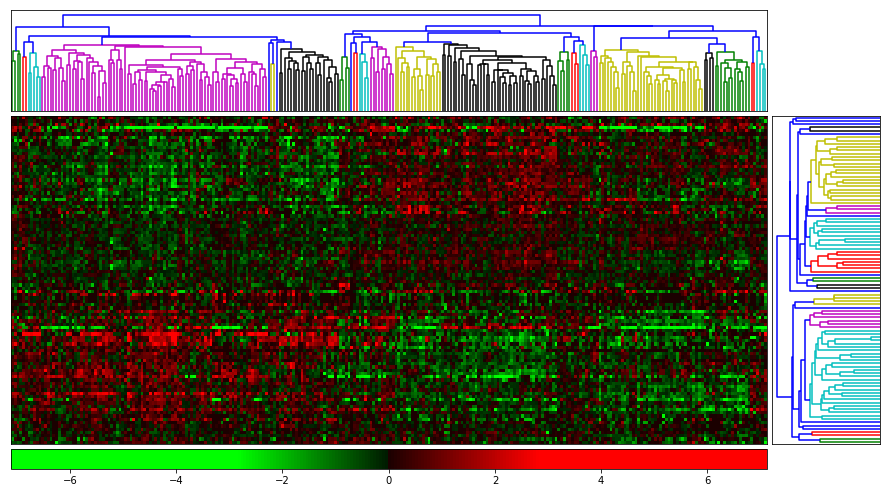

In [33]:
# Compute and plot first dendrogram -- quello sopra 
fig = pylab.figure(figsize=(15,7))
ax1 = fig.add_axes([0.1,0.71,0.7,0.2])
Y = sch.linkage(dist.pdist(X, 'correlation'), method='average')
Z1 = sch.dendrogram(Y)
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram. -- quello a destra 
ax2 = fig.add_axes([0.805,0.05,0.1,0.65])
Y = sch.linkage(dist.pdist(X.T, 'correlation'), method='average')
Z2 = sch.dendrogram(Y, orientation='left')
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.1,0.05,0.7,0.65])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
X = X[idx1,:]
X = X[:,idx2]
norm = plt.cm.colors.Normalize(vmax=abs(X).max(), vmin=-abs(X).max())
im = axmatrix.matshow(X.T, aspect='auto', origin='lower', cmap=redblackgreen, norm=norm)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar (quella sotto a tutto)
axcolor = fig.add_axes([0.1,0.,0.7,0.04])
pylab.colorbar(im, cax=axcolor, orientation='horizontal');

"Panel A shows the hierarchical clustering of diffuse large-B-cell lymphomas from 240 patients with untreated disease and 34 patients who had previously been treated or who had a preexisting low-grade lymphoma, according to the level of expression of 100 genes. Red areas indicate increased expression, and green areas decreased expression. Each column represents a single diffuse large-B-cell lymphoma, and each row represents a single gene. ..."